In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.0 - EDA uppvärmning

In [5]:
# load in datas
cardio_train = pd.read_csv("cardio_train.csv", sep=";")
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
disease_count = cardio_train.cardio.value_counts()
print(f"Number of positive is: {disease_count[1]}")
print(f"Number of negative is: {disease_count[0]}")


Number of positive is: 34979
Number of negative is: 35021


In [23]:
cardio_train[["cholesterol"]].value_counts()

cholesterol
1              52385
2               9549
3               8066
dtype: int64

Text(0.5, 1.0, 'Kolesterolvärden')

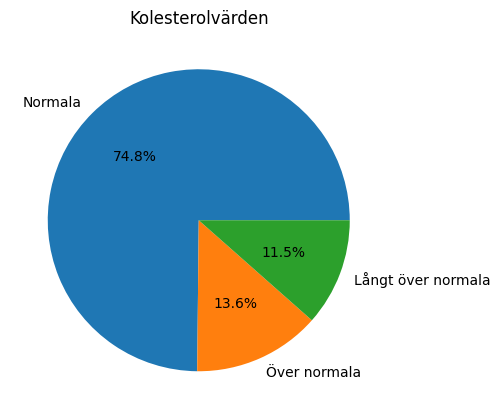

In [37]:
plt.figure(figsize=(5,5), dpi=100)
plt.pie(cardio_train[["cholesterol"]].value_counts(), autopct="%1.1f%%", labels=["Normala", "Över normala", "Långt över normala"])
plt.title("Kolesterolvärden")

Text(0.5, 1.0, 'Age distribution')

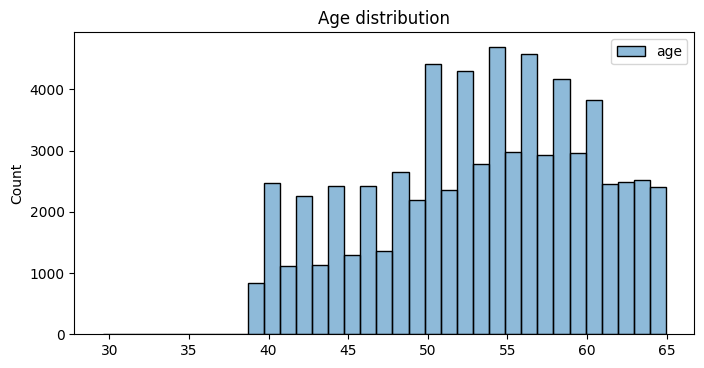

In [59]:
age = cardio_train[["age"]]/365

plt.figure(figsize=(8,4), dpi=100)
sns.histplot(age, bins=35)
plt.title("Age distribution")

In [89]:
cardio_train[["smoke"]]

,smoke
0,0
1,0
2,0
3,0
4,0
...,...
69995,1
69996,0
69997,0
69998,0


In [96]:
smoke_percent = (cardio_train[["smoke"]].value_counts()[1]/cardio_train[["smoke"]].count())*100
smoke_percent
# About 8.8% smokers

smoke    8.812857
dtype: float64

Text(0.5, 1.0, 'Weight distribution')

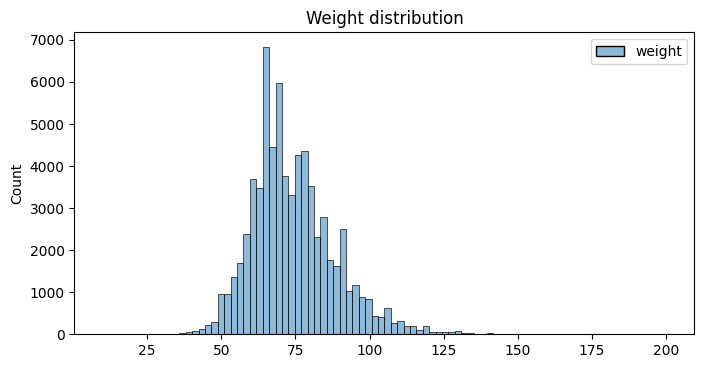

In [109]:
plt.figure(figsize=(8,4), dpi=100)
sns.histplot(cardio_train[["weight"]], bins=88)
plt.title("Weight distribution")

Text(0.5, 1.0, 'Height distribution')

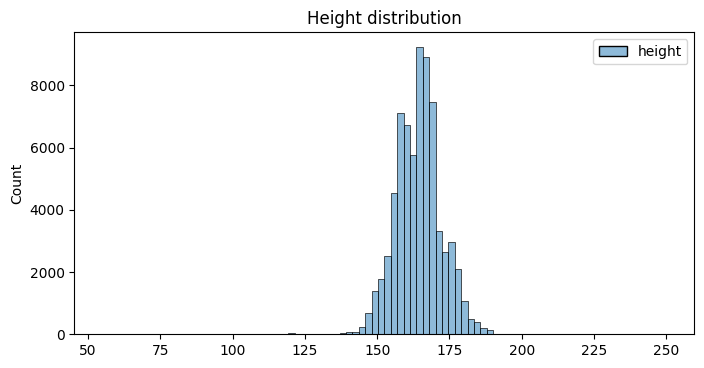

In [113]:
plt.figure(figsize=(8,4), dpi=100)
sns.histplot(cardio_train[["height"]], bins=88)
plt.title("Height distribution")

In [175]:
gender = pd.DataFrame((cardio_train.cardio == 1).groupby(cardio_train["gender"]).sum())
gender

,cardio
gender,
1,22616
2,12363


Text(0.5, 1.0, 'Disease in gender')

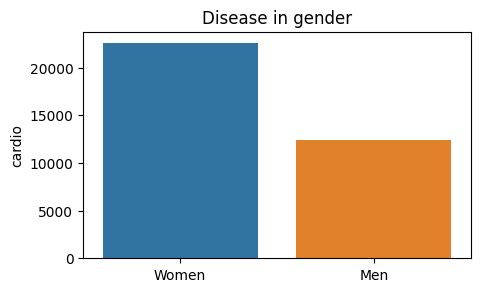

In [177]:
plt.figure(figsize=(5,3), dpi=100)
sns.barplot(data=gender, x=["Women", "Men"], y="cardio")
plt.title("Disease in gender")